In [1]:
from matplotlib import pyplot as plt
from pyfiles.mod_topic_influence_base import *
folder = "../data/mgp_data/"
publ_file = "final_mathscinet_publs_included_remaining_publ_processed_with_thesis_title.pkl"

In [14]:
topic_model = "./topic_models/topic_model_mathscinet_25_with_all_and_thesis_title.gensim"
topic_dict  = "./topic_models/dictionary_mathscinet_25_with_all_and_thesis_title.gensim"
corpus_filename      = "./topic_models/corpus_mathscinet_25_with_all_and_thesis_title.pkl"

In [3]:
lda_model, id2word = load_topic_model(topic_model, topic_dict, corpus)
lda_model.minimum_probability = 0.0
num_topics= lda_model.num_topics

In [4]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=5, step=5, coherence="c_v"):
    coherence_values = []
    #model_list = []
    perplexity = []
    topics = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, 
                             num_topics=num_topics, workers = 8, passes=10, random_state=100)
        #model_list.append(model)
        perplexity.append(model.log_perplexity(corpus))
        topics.append(num_topics)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())
    return perplexity, coherence_values, topics

In [5]:
def create_corpus(data_lemmatized):
    id2word = corpora.Dictionary(data_lemmatized)
    id2word.filter_extremes(no_below=10, no_above=0.5)#no_below=2
    texts  = data_lemmatized
    corpus = [id2word.doc2bow(text) for text in texts]
    return (id2word, texts, corpus)

In [6]:
def publicaton_data(filename = "", stem_title=True):     
    publication = pd.read_pickle(folder+filename)
    print(f"publication count: {publication.shape[0]}")
    publication["clean_title"] = hero.clean(publication["title"])
    if stem_title:
        publication["clean_title"] = hero.stem(publication["clean_title"])
    publication1 = publication.groupby(["author_id","publication_year"])['clean_title'].apply(list).reset_index(name='yearwise_titles').copy()
    print(f"Publication group by (author_id, year) count: {publication1.shape[0]}")
    return publication1

In [ ]:
def plot_coherence(coherence_values, topics, label="c_v", num_topics=25, add_info=""):
    fig = plt.figure()
    plt.plot(topics, coherence_values, label=label)
    plt.xlabel('Number of Topics')
    plt.ylabel('C_V Score')
    plt.legend()
    plt.savefig(f"score_{label}_mathscinet_{num_topics}_{add_info}.pdf")
    #plt.show()
    return

In [23]:
def plot_perplexity(perplexity, topics, label="Perplexity",num_topics=25, add_info=""):
    fig = plt.figure()
    plt.plot(topics, perplexity, label=label)
    plt.xlabel('Number of Topics')
    plt.ylabel('Log Perplexity')
    plt.legend()
    plt.savefig(f"score_{label}_mathscinet_{num_topics}_{add_info}.pdf")
    #plt.show()
    return

In [7]:
publication1 = publicaton_data(publ_file, stem_title=True)
#publication1 = publication1.sample(1000)
titles = [" ".join(year_titles) for year_titles in publication1["yearwise_titles"].values.tolist()]
del publication1
#print(f"Time taken (in minutes)= {(time.time() - start_time)/60}")

publication count: 2972504
Publication group by (author_id, year) count: 1390579


In [8]:
data_lemmatized = prepare_text_for_lda(titles)

In [11]:
id2word1, texts1, corpus1 = create_corpus(data_lemmatized)

In [33]:
del texts1

In [29]:
del lda_model

In [15]:
corpus = pickle.load(open(corpus_filename, 'rb'))

In [30]:
del corpus

In [17]:
perplexity, coherence_values, topics = compute_coherence_values(id2word, corpus, texts1, 35)

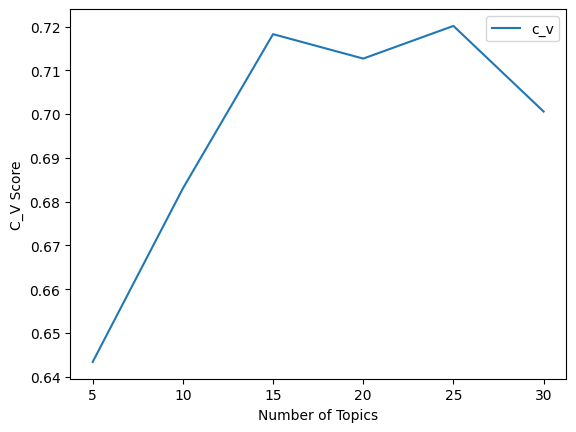

In [22]:
plot_coherence(coherence_values,topics,label="c_v", num_topics=25, add_info="all_and_thesis_title")

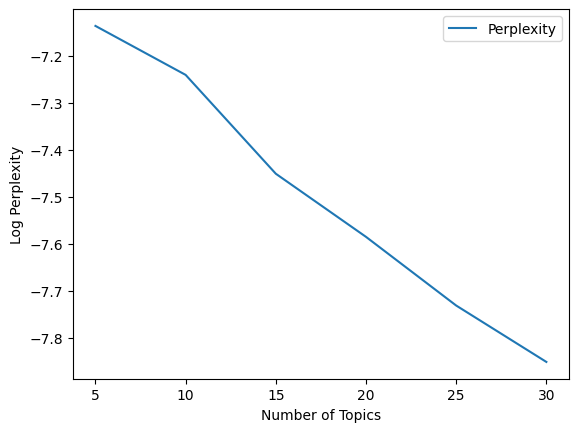

In [24]:
plot_perplexity(perplexity, topics, label="Perplexity",num_topics=25, add_info="all_and_thesis_title")

In [18]:
#corpus

In [25]:
#plt.plot(topics,coherence_values)